<a href="https://colab.research.google.com/github/nestorpereiralinares/PySpark_ML-NN-TensorFlow/blob/main/NN_Regression_TensorFlow_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.11.0


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [4]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [6]:
train_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


**Scale dataset**

In [8]:
 

# Regression Analysis Using Tensorflow
# The entire code was executed in Google Colab. The data we use is the California housing prices dataset, in which we are going to predict the median housing prices. The data is available in the Colab in the path /content/sample_data/california_housing_train.csv. We are going to use TensorFlow to train the model.


def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

x_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908


**Build the model**

In [17]:
#hidden_units1 = 160
#hidden_units2 = 480
#hidden_units3 = 256
learning_rate = 0.01

# Creating model using the Sequential in tensorflow

def build_model_using_sequential():
  model = Sequential([
    Dense(units=160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(units=480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(units=256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

# build the model
model = build_model_using_sequential()

**Loss function** and trainig **model**

In [18]:
# loss function
#msle = MeanSquaredLogarithmicError()

model.compile(
    #loss=msle, 
    #optimizer=Adam(learning_rate=learning_rate), 
    optimizer = 'adam', loss = 'mean_squared_error',
    #metrics=[msle]
    metrics='mean_squared_error'
)


# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 3s 6ms/step - loss: 36016754688.0000 - mean_squared_error: 36016754688.0000 - val_loss: 44025294848.0000 - val_mean_squared_error: 44025294848.0000
Epoch 2/10
213/213 [==============================] - 1s 6ms/step - loss: 9728977920.0000 - mean_squared_error: 9728977920.0000 - val_loss: 17624981504.0000 - val_mean_squared_error: 17624981504.0000
Epoch 3/10
213/213 [==============================] - 1s 6ms/step - loss: 5950445568.0000 - mean_squared_error: 5950445568.0000 - val_loss: 7940263424.0000 - val_mean_squared_error: 7940263424.0000
Epoch 4/10
213/213 [==============================] - 1s 5ms/step - loss: 4963477504.0000 - mean_squared_error: 4963477504.0000 - val_loss: 6748773376.0000 - val_mean_squared_error: 6748773376.0000
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 4567514624.0000 - mean_squared_error: 4567514624.0000 - val_loss: 5871555072.0000 - val_mean_squared_error: 5871555072.0000
Epoc

After training, plot the history.

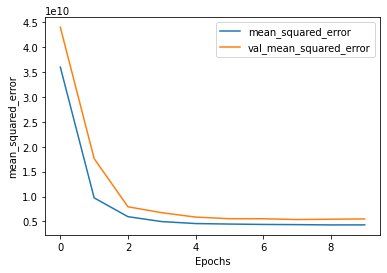

In [19]:


def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'mean_squared_error')

Make predictions

In [22]:
x_test['prediction'] = model.predict(x_test_scaled)
x_test

94/94 [==============================] - 0s 2ms/step


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prediction
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,343241.843750
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,210474.000000
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,265328.875000
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,323862.718750
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,108040.750000
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,200626.875000
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,149722.093750
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,117773.734375
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,139233.609375
